GRF code

C:\Users\lukas\AppData\Local\Temp\ipykernel_22008\4280547616.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)


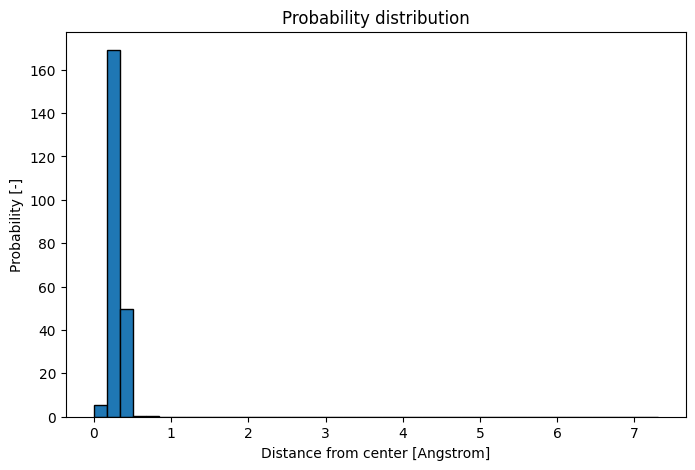

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the uploaded file to inspect its structure
file_path = "data/grf_data.dat"

# Try reading as whitespace-separated values
try:
    df = pd.read_csv(file_path, delim_whitespace=True, header=None)
except Exception as e:
    df = str(e)

# Extract x and y from the dataframe
x = df[0].values
y = df[1].values

# Estimate bin edges from midpoints
bin_edges = np.concatenate((
    [x[0] - (x[1] - x[0]) / 2],   # first edge
    (x[:-1] + x[1:]) / 2,         # midpoints
    [x[-1] + (x[-1] - x[-2]) / 2] # last edge
))

# Plot histogram-style bar chart
plt.figure(figsize=(8,5))
plt.bar(x, y, width=np.diff(bin_edges), align='center', edgecolor='black')

plt.xlabel("Distance from center [Angstrom]")
plt.ylabel("Probability [-]")
plt.title("Probability distribution")
plt.show()


Energy conservation B1

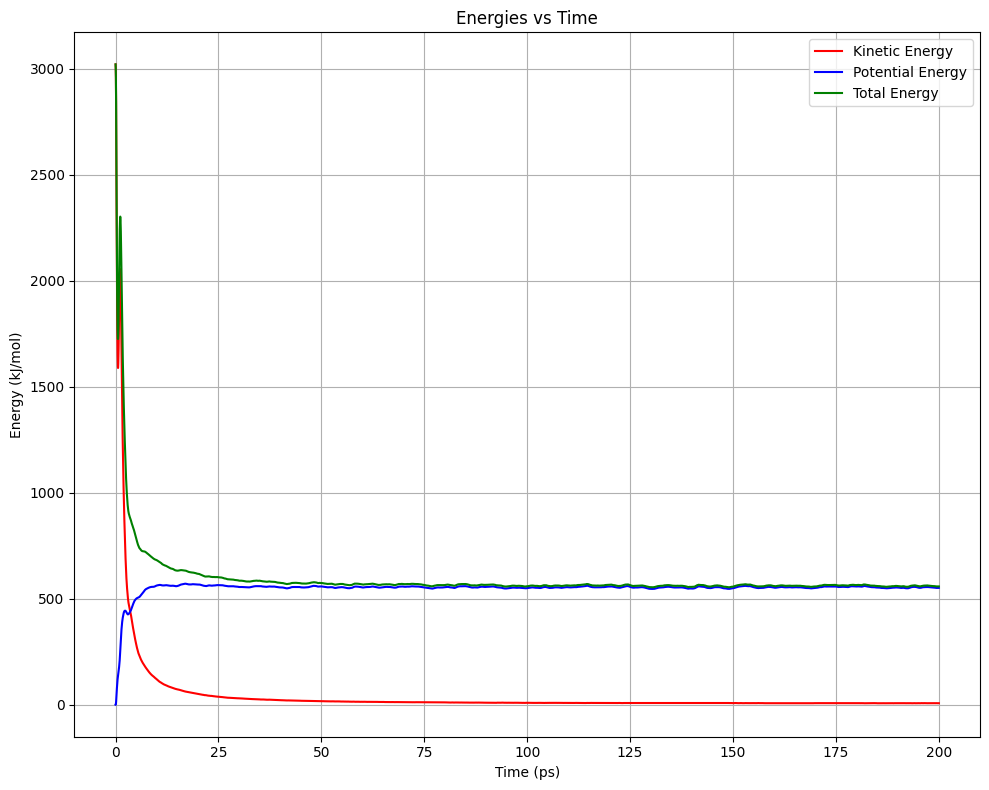

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("data/diagnostics.csv")

plt.figure(figsize=(10,8))

# 1) Energies
# Indexing is fucked for some reason, but it works for now so don't touch ;)
plt.plot(df["time"], label="Kinetic Energy", color="red")
plt.plot(df["kinetic_energy"], label="Potential Energy", color="blue")
plt.plot(df["potential_energy"], label="Total Energy", color="green")

plt.ylabel("Energy (kJ/mol)")
plt.xlabel("Time (ps)") 
plt.title("Energies vs Time")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
 